In [1]:
import numpy as np
import pandas as pd

In [2]:
%precision 3

'%.3f'

In [5]:
pd.set_option('display.float_format','{:.3f}'.format)
# pd.set_option('display.float_format',None)

In [8]:
df = pd.read_csv('data/ch2_scores_em.csv',index_col='student number')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 1 to 50
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   english      50 non-null     int64
 1   mathematics  50 non-null     int64
dtypes: int64(2)
memory usage: 1.2 KB


In [10]:
np.__version__ 

'1.21.5'

In [11]:
pd.__version__

'1.4.4'

In [13]:
np.mean(df['english'])

58.380

In [14]:
scores = np.array(df['english'])[:10]
scores

array([42, 69, 56, 41, 57, 48, 65, 49, 65, 58], dtype=int64)

In [16]:
df['english'].values[:10]

array([42, 69, 56, 41, 57, 48, 65, 49, 65, 58], dtype=int64)

In [20]:
scores_df = pd.DataFrame({'score':scores},
             index=pd.Index(['A','B','C','D','E','F','G','H','I','J'],
                           name='student')
            )

In [21]:
scores_df

,score
student,
A,42
B,69
C,56
D,41
E,57
F,48
G,65
H,49
I,65


In [29]:
sum(scores)/len(scores)

55.0

In [30]:
sum(scores_df['score'])/len(scores_df['score'])

55.000

In [31]:
np.mean(scores)

55.0

In [32]:
np.mean(scores_df['score'])

55.000

In [33]:
scores_df['score'].mean()

55.000

In [34]:
scores_df.mean()

score   55.000
dtype: float64

In [35]:
sorted_scores = np.sort(scores)
sorted_scores

array([41, 42, 48, 49, 56, 57, 58, 65, 65, 69], dtype=int64)

In [38]:
n = len(sorted_scores)
if n % 2 == 0:
    m0 = sorted_scores[n//2-1]
    m1 = sorted_scores[n//2]
    median = (m0+m1)/2
else:
    median = sorted_scores[(n+1)//2-1]
median

56.5

In [39]:
np.median(scores)

56.5

In [40]:
scores_df.median()

score   56.500
dtype: float64

In [41]:
scores_df.mode()

,score
0,65


In [42]:
pd.Series([1,1,2,2,3]).mode()

0    1
1    2
dtype: int64

In [43]:
pd.Series([1,2,3,4,5,6]).mode()

0    1
1    2
2    3
3    4
4    5
5    6
dtype: int64

In [45]:
mean = np.mean(scores)
mean

55.0

In [47]:
deviation = scores - mean
deviation

array([-13.,  14.,   1., -14.,   2.,  -7.,  10.,  -6.,  10.,   3.])

In [48]:
deviation.sum()

0.0

In [49]:
deviation.mean()

0.0

In [50]:
summary_df = scores_df.copy()
summary_df['deviation'] =deviation
summary_df

,score,deviation
student,,
A,42,-13.000
B,69,14.000
C,56,1.000
D,41,-14.000
E,57,2.000
F,48,-7.000
G,65,10.000
H,49,-6.000
I,65,10.000


In [51]:
summary_df.mean()

score       55.000
deviation    0.000
dtype: float64

In [52]:
np.mean(deviation ** 2)

86.0

In [55]:
np.var(scores,ddof=1)

95.55555555555556

In [56]:
scores_df.var(ddof=0)

score   86.000
dtype: float64

In [57]:
summary_df['square of deviation'] = np.square(deviation)
summary_df

,score,deviation,square of deviation
student,,,
A,42,-13.000,169.000
B,69,14.000,196.000
C,56,1.000,1.000
D,41,-14.000,196.000
E,57,2.000,4.000
F,48,-7.000,49.000
G,65,10.000,100.000
H,49,-6.000,36.000
I,65,10.000,100.000


In [58]:
summary_df.mean()

score                 55.000
deviation              0.000
square of deviation   86.000
dtype: float64

In [60]:
np.sqrt(np.var(scores,ddof=0))

9.273618495495704

In [61]:
np.std(scores, ddof=0)

9.273618495495704

In [64]:
scores_df.std(ddof=0)

score   9.274
dtype: float64

In [65]:
np.max(scores) - np.min(scores)

28

In [66]:
scores_q1 = np.percentile(scores,25)
scores_q2 = np.percentile(scores,50)
scores_q3 = np.percentile(scores,75)
scores_q1,scores_q2,scores_q3

(48.25, 56.5, 63.25)

In [67]:
scores_iqr = scores_q3-scores_q1
scores_iqr

15.0

In [68]:
scores_df.describe()

,score
count,10.000
mean,55.000
std,9.775
min,41.000
25%,48.250
50%,56.500
75%,63.250
max,69.000


In [69]:
z = (scores - np.mean(scores))/np.std(scores)

In [70]:
z

array([-1.402,  1.51 ,  0.108, -1.51 ,  0.216, -0.755,  1.078, -0.647,
        1.078,  0.323])

In [72]:
np.round(np.mean(z),3)

-0.0

In [74]:
np.std(z,ddof=0)

0.9999999999999999

In [75]:
z =50 + 10 * (scores - np.mean(scores))/np.std(scores)

In [76]:
np.mean(z)

50.0

In [77]:
np.std(z)

10.000000000000002

In [78]:
z

array([35.982, 65.097, 51.078, 34.903, 52.157, 42.452, 60.783, 43.53 ,
       60.783, 53.235])

In [79]:
scores_df['deviation value'] = z

In [80]:
scores_df

,score,deviation value
student,,
A,42,35.982
B,69,65.097
C,56,51.078
D,41,34.903
E,57,52.157
F,48,42.452
G,65,60.783
H,49,43.530
I,65,60.783


In [81]:
english_scores = np.array(df['english'])

In [82]:
pd.Series(english_scores).describe()

count   50.000
mean    58.380
std      9.800
min     37.000
25%     54.000
50%     57.500
75%     65.000
max     79.000
dtype: float64

In [83]:
df['english'].describe()

count   50.000
mean    58.380
std      9.800
min     37.000
25%     54.000
50%     57.500
75%     65.000
max     79.000
Name: english, dtype: float64

In [87]:
freq, _ = np.histogram(df['english'],bins=10,range=(0,100))

In [88]:
freq

array([ 0,  0,  0,  2,  8, 16, 18,  6,  0,  0], dtype=int64)

In [89]:
freq_class = [ f'{i}-{i+10}' for i in range(0,100,10)]
freq_class

['0-10',
 '10-20',
 '20-30',
 '30-40',
 '40-50',
 '50-60',
 '60-70',
 '70-80',
 '80-90',
 '90-100']

In [90]:
freq_dist_df = pd.DataFrame({'frequency':freq},
                            index = pd.Index(freq_class,
                                             name='class')
                           )
freq_dist_df

,frequency
class,
0-10,0
10-20,0
20-30,0
30-40,2
40-50,8
50-60,16
60-70,18
70-80,6
80-90,0


In [91]:
class_value = [(i + ( i+10 )) // 2 for i in range(0,100,10)]
class_value

[5, 15, 25, 35, 45, 55, 65, 75, 85, 95]

In [92]:
rel_freq = freq / freq.sum()
rel_freq

array([0.  , 0.  , 0.  , 0.04, 0.16, 0.32, 0.36, 0.12, 0.  , 0.  ])

In [93]:
cum_rel_freq = np.cumsum(rel_freq)
cum_rel_freq

array([0.  , 0.  , 0.  , 0.04, 0.2 , 0.52, 0.88, 1.  , 1.  , 1.  ])

In [97]:
freq_dist_df['class value'] = class_value
freq_dist_df['relative frequency'] = rel_freq
freq_dist_df['cumulative relative frequency'] = cum_rel_freq
freq_dist_df.head(2)

,frequency,class value,relative frequency,cumulative relative frequency
class,,,,
0-10,0,5,0.000,0.000
10-20,0,15,0.000,0.000


In [105]:
freq_dist_df = freq_dist_df[ [ 'class value','frequency','relative frequency',
       'cumulative relative frequency']]

In [106]:
freq_dist_df

,class value,frequency,relative frequency,cumulative relative frequency
class,,,,
0-10,5,0,0.000,0.000
10-20,15,0,0.000,0.000
20-30,25,0,0.000,0.000
30-40,35,2,0.040,0.040
40-50,45,8,0.160,0.200
50-60,55,16,0.320,0.520
60-70,65,18,0.360,0.880
70-80,75,6,0.120,1.000
80-90,85,0,0.000,1.000


In [107]:
import matplotlib.pyplot as plt

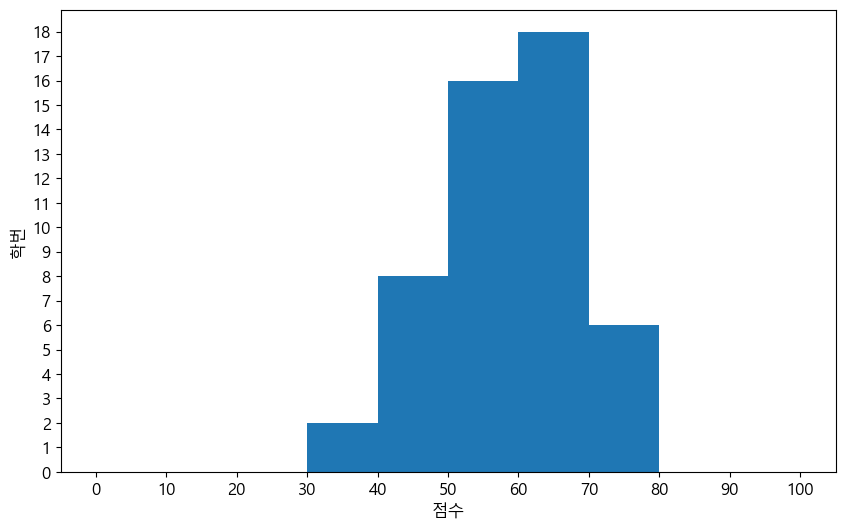

In [113]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
freq, _, _ = ax.hist(df['english'],bins=10,range=(0,100))
ax.set_xlabel('점수')
ax.set_ylabel('학번')
ax.set_xticks(np.linspace(0,100,10+1))
ax.set_yticks(np.arange(0,freq.max()+1))
plt.show()

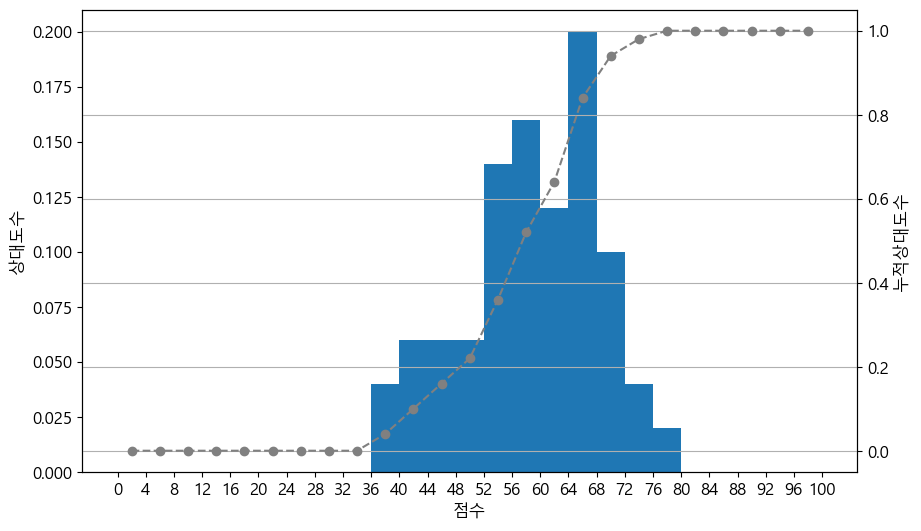

In [127]:
fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(111)
ax2 = ax1.twinx()
weights = np.ones_like(english_scores) / len(english_scores)
rel_freq , _ , _ = ax1.hist(english_scores,bins=25,range=(0,100),weights=weights)
cum_rel_freq = np.cumsum(rel_freq)
class_value = [ (i+(i+4))//2  for i in range(0,100,4)]
ax2.plot(class_value, cum_rel_freq,ls='--',marker='o',color='gray')
ax2.grid(visible=True)
ax1.set_xlabel('점수')
ax1.set_ylabel('상대도수')
ax2.set_ylabel('누적상대도수')
ax1.set_xticks(np.linspace(0,100,25+1))
plt.show()

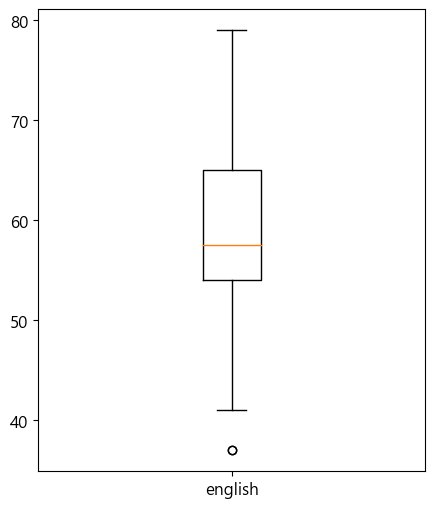

In [129]:
fig = plt.figure(figsize=(5,6))
ax = fig.add_subplot(111)
ax.boxplot(english_scores,labels=['english'])
plt.show()